In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


17:07:28 - cmdstanpy - INFO - Chain [1] start processing
17:07:28 - cmdstanpy - INFO - Chain [1] done processing


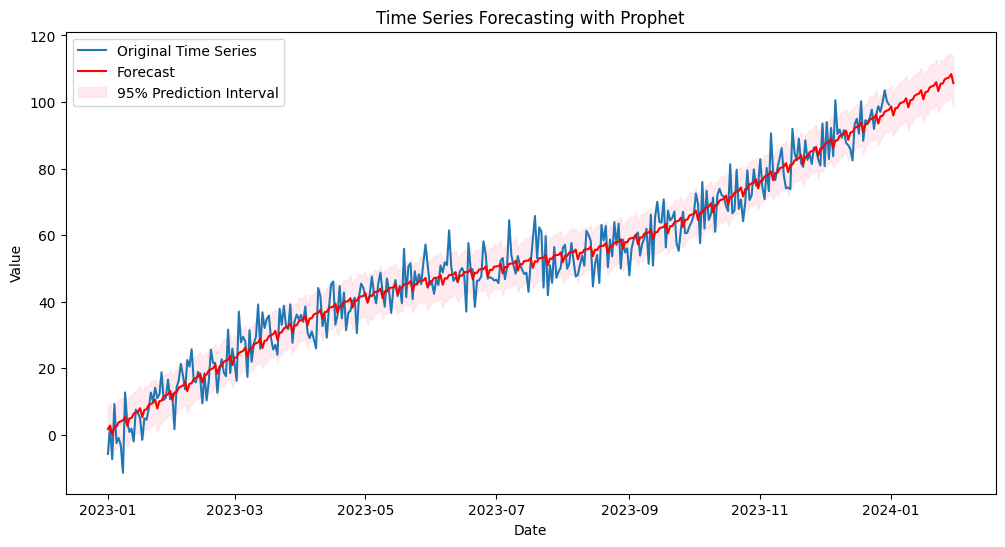

In [5]:
# Generate a time series with linear trend and seasonality
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
linear_trend = np.linspace(0, 100, len(date_rng))  # Linear trend from 0 to 100
seasonality = 10 * np.sin(2 * np.pi * np.arange(len(date_rng)) / 365)  # Seasonal pattern
time_series_data = linear_trend + seasonality + np.random.randn(len(date_rng)) * 5  # Add noise
ts = pd.DataFrame({'ds': date_rng, 'y': time_series_data})

# Create and fit a Prophet model
model = Prophet()
model.fit(ts)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future

# Make predictions
forecast = model.predict(future)

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts['ds'], ts['y'], label='Original Time Series')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Time Series Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

17:17:29 - cmdstanpy - INFO - Chain [1] start processing
17:17:29 - cmdstanpy - INFO - Chain [1] done processing


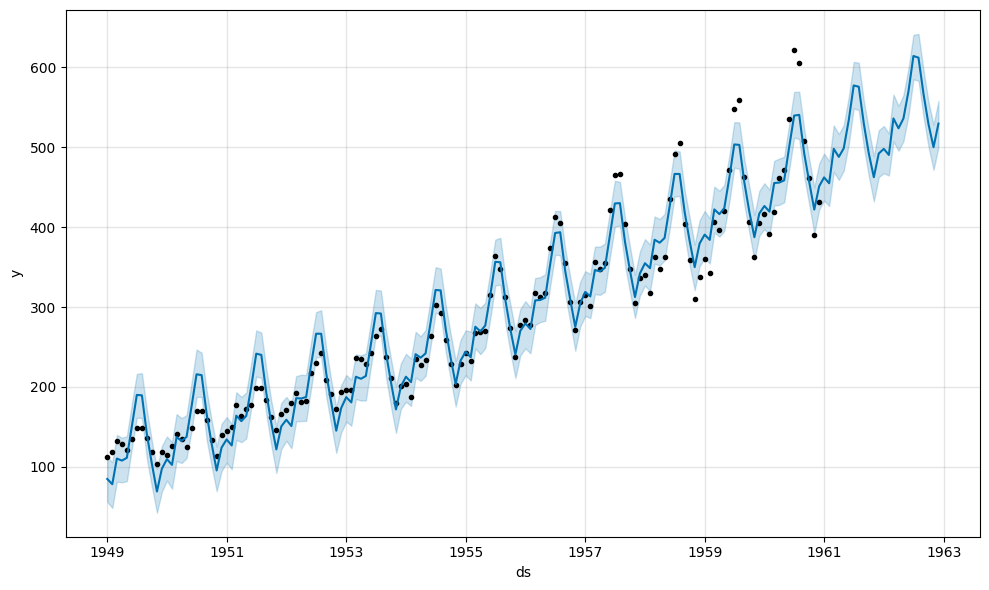

In [13]:
# Sample dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

# Preprocessing: Prophet expects columns named as 'ds' (dates) and 'y' (values)
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Make predictions
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,1.296555,-5.302868,8.185594,1.296555,1.296555,0.419929,0.419929,0.419929,0.419929,0.419929,0.419929,0.0,0.0,0.0,1.716484
1,2023-01-02,1.668868,-3.977361,9.482837,1.668868,1.668868,1.075518,1.075518,1.075518,1.075518,1.075518,1.075518,0.0,0.0,0.0,2.744386
2,2023-01-03,2.041180,-6.373786,6.574109,2.041180,2.041180,-1.990714,-1.990714,-1.990714,-1.990714,-1.990714,-1.990714,0.0,0.0,0.0,0.050467
3,2023-01-04,2.413493,-4.122180,8.589385,2.413493,2.413493,-0.161597,-0.161597,-0.161597,-0.161597,-0.161597,-0.161597,0.0,0.0,0.0,2.251896
4,2023-01-05,2.785805,-4.267384,8.812311,2.785805,2.785805,-0.381248,-0.381248,-0.381248,-0.381248,-0.381248,-0.381248,0.0,0.0,0.0,2.404558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2024-01-26,106.294895,100.216330,113.100351,105.675656,106.872861,0.535334,0.535334,0.535334,0.535334,0.535334,0.535334,0.0,0.0,0.0,106.830229
391,2024-01-27,106.642802,100.356931,114.087046,105.996359,107.254601,0.502776,0.502776,0.502776,0.502776,0.502776,0.502776,0.0,0.0,0.0,107.145578
392,2024-01-28,106.990708,100.634049,114.087091,106.306631,107.645396,0.419929,0.419929,0.419929,0.419929,0.419929,0.419929,0.0,0.0,0.0,107.410638
393,2024-01-29,107.338615,101.947457,114.819048,106.613354,108.033654,1.075518,1.075518,1.075518,1.075518,1.075518,1.075518,0.0,0.0,0.0,108.414133


17:23:32 - cmdstanpy - INFO - Chain [1] start processing
17:23:32 - cmdstanpy - INFO - Chain [1] done processing


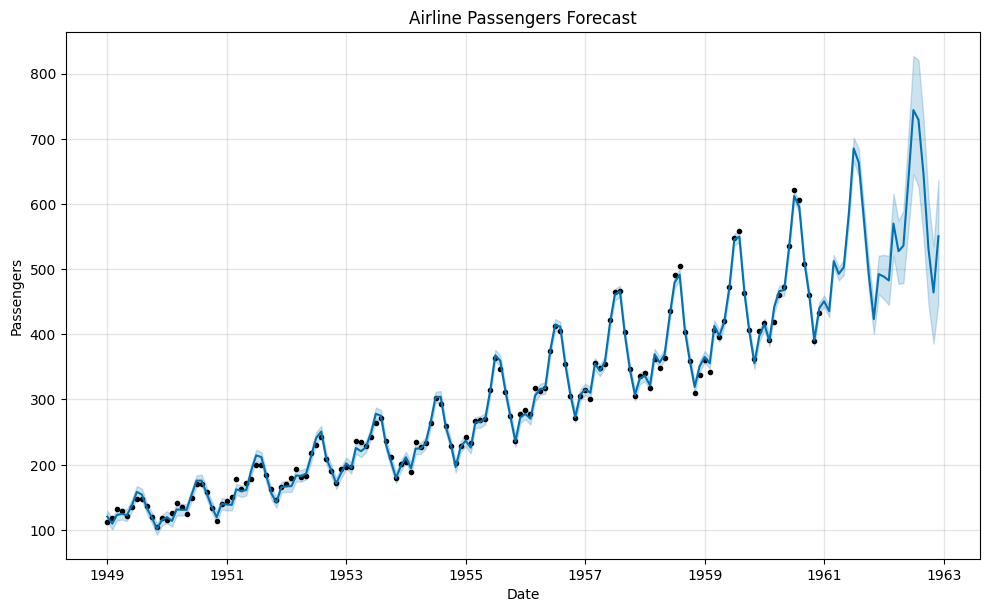

In [17]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

# Preprocessing
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])

# Initialize and fit Prophet model
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                changepoint_prior_scale=0.5)
model.fit(data)

# Define holidays
# holidays = pd.DataFrame({
#     'holiday': 'peak_season',
#     'ds': pd.to_datetime(['1952-07-01', '1952-08-01', '1952-09-01', '1952-10-01', 
#                           '1953-07-01', '1953-08-01', '1953-09-01', '1953-10-01',
#                           '1954-07-01', '1954-08-01', '1954-09-01', '1954-10-01']),
#     'lower_window': 0,
#     'upper_window': 1,
# })

# Make future dataframe
future = model.make_future_dataframe(periods=24, freq='M')

# Predict
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("Airline Passengers Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.show()